In [1]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import os
import random
import time
import pickle
import gc
import re
import itertools

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_dir = '/home/fbm221/W266FinalProject'

In [3]:
outdata_path = main_dir + '/saved_files/LDA/Ethnicity/'

In [4]:
all_speeches_topics_df = pd.read_pickle(outdata_path+'speeches_topics_ethnicity_36')
all_speeches_topics_df.shape

(62840, 9)

In [5]:
all_speeches_topics_df.head()

,Topic_Count,Prim_Topic,Prim_Topic_Name,Prim_Topic_Contrib,Prim_Topic_Keywords,Sec_Topic,Sec_Topic_Name,Sec_Topic_Contrib,Speech_id
0,8.0,22.0,Random Verbs 2,0.35,"get,think,want,come,know,talk,us,way,see,try",32.0,Women's and Labor Rights,0.21,1010243717
1,10.0,19.0,Positive Words,0.20,"community,serve,service,honor,award,dr,univers...",20.0,Military Service,0.14,1120097305
2,4.0,23.0,Common Congressional Phrases 2,0.37,"amendment,vote,amendments,senators,ask_unanimo...",29.0,Finance,0.21,1020183502
3,10.0,17.0,Children's and Family Programs,0.27,"children,program,families,provide,help,child,n...",19.0,Positive Words,0.27,1080187463
4,11.0,13.0,Veterans,0.31,"veterans,service,federal,legislation,benefit,t...",21.0,Foreign Trade,0.18,1090010764


In [6]:
all_speeches_topics_df.Speech_id = all_speeches_topics_df.Speech_id.astype('int')

In [7]:
indata_path = main_dir + '/Data/Predictions/'

In [8]:
descr_pred_df = pd.read_pickle(os.path.join(indata_path, 'ethnicity_preds.pkl'))
descr_pred_df.shape

(62840, 20)

In [9]:
descr_pred_df.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match,ids,pred_probs_combo,pred_combo
0,1010243717,19901025,870,166,101110870.0,D,101,H,TX,B,49.0,1.0,1.0,0.0,Mr. WASHINGTON,"WASHINGTON, CRAIG",exact,1010243717,0.432673,False
1,1120097305,20120416,1186,197,112116570.0,R,112,H,OH,AAPIA,54.0,1.0,1.0,0.0,Mr. AUSTRIA,"AUSTRIA, STEVE",fuzzy,1120097305,0.787741,True
2,1020183502,19920630,257,40,102111850.0,D,102,H,TX,H,76.0,0.0,1.0,0.0,Mr. GONZALEZ,"GONZALEZ, HENRY",exact,1020183502,0.362346,False
3,1080187463,20041001,2689,420,108115260.0,D,108,H,MD,B,53.0,1.0,1.0,0.0,Mr. WYNN,"WYNN, ALBERT",fuzzy,1080187463,0.507420,True
4,1090010764,20050309,7723,1156,109116411.0,D,109,S,HI,AAPIA,82.0,0.0,1.0,0.0,Mr. AKAKA,"AKAKA, DANIEL",exact,1090010764,0.730280,True


In [10]:
final_df = descr_pred_df.merge(all_speeches_topics_df, 
                               left_on='speech_id',
                               right_on='Speech_id')
final_df.shape

(62840, 29)

In [15]:
final_df['Correct_pred'] = final_df.NonWhite == final_df.pred_combo
np.mean(final_df['Correct_pred'])

0.7670432845321451

In [16]:
final_df.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,...,Topic_Count,Prim_Topic,Prim_Topic_Name,Prim_Topic_Contrib,Prim_Topic_Keywords,Sec_Topic,Sec_Topic_Name,Sec_Topic_Contrib,Speech_id,Correct_pred
0,1010243717,19901025,870,166,101110870.0,D,101,H,TX,B,...,8.0,22.0,Random Verbs 2,0.35,"get,think,want,come,know,talk,us,way,see,try",32.0,Women's and Labor Rights,0.21,1010243717,False
1,1120097305,20120416,1186,197,112116570.0,R,112,H,OH,AAPIA,...,10.0,19.0,Positive Words,0.20,"community,serve,service,honor,award,dr,univers...",20.0,Military Service,0.14,1120097305,True
2,1020183502,19920630,257,40,102111850.0,D,102,H,TX,H,...,4.0,23.0,Common Congressional Phrases 2,0.37,"amendment,vote,amendments,senators,ask_unanimo...",29.0,Finance,0.21,1020183502,False
3,1080187463,20041001,2689,420,108115260.0,D,108,H,MD,B,...,10.0,17.0,Children's and Family Programs,0.27,"children,program,families,provide,help,child,n...",19.0,Positive Words,0.27,1080187463,True
4,1090010764,20050309,7723,1156,109116411.0,D,109,S,HI,AAPIA,...,11.0,13.0,Veterans,0.31,"veterans,service,federal,legislation,benefit,t...",21.0,Foreign Trade,0.18,1090010764,True


In [13]:
# adjust location for the full_descr.txt file
descr_df = pd.read_csv(main_dir+'/Data/full_descr.txt', sep="|", index_col=0)
descr_df.reset_index(inplace=True)

/home/fbm221/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Average ethnicity score by topic

In [17]:
final_df[['pred_probs_combo', 'Correct_pred', 'Prim_Topic_Name']]\
        .groupby('Prim_Topic_Name')\
        .agg({'pred_probs_combo': ['count', 'mean'],
              'Correct_pred': ['mean']})\
        .sort_values(by=('pred_probs_combo','mean'), ascending=False)

pred_probs_combo           Correct_pred
                                          count      mean         mean
Prim_Topic_Name                                                       
Art and Culture                             326  0.689710     0.825153
Great Nation                               1722  0.680718     0.814750
Common Congressional Phrases 5              631  0.619452     0.755943
Children's and Family Programs             1174  0.614540     0.784497
Economy                                     989  0.603903     0.825076
Education                                  1276  0.588209     0.808777
Positive Words                             5194  0.584817     0.832692
Healthcare Studies                          759  0.576877     0.786561
Women's and Labor Rights                    570  0.571861     0.756140
State and Local                             225  0.565792     0.768889
Freedom                                     819  0.550374     0.766789
Veterans                                   1123  0.541384     0.743544
Military Service                            798  0.526850     0.734336
Intelligence and Security                   851  0.510189     0.721504
Random Verbs                               2248  0.510046     0.776690
Air Travel                                   65  0.506910     0.769231
Drug and Violent Crime                      476  0.505054     0.766807
Finance                                    1090  0.501726     0.783486
Healthcare                                 1054  0.500829     0.777040
Elections and Parties                      2538  0.489791     0.757289
War and Defense                            1526  0.487285     0.711009
Scientific Research                         320  0.476730     0.709375
Common Congressional Phrases               6335  0.457965     0.729282
Common Congressional Phrases 2             6832  0.454898     0.768150
Environment                                1563  0.451358     0.721689
Bankruptcy and Liability                     74  0.437064     0.729730
Programs and Budget                        2342  0.435791     0.755764
Judicial System                             747  0.431872     0.749665
Taxes and Budget                           2579  0.406846     0.769290
Common Congressional Phrases 3             3984  0.405162     0.723896
Foreign Policy                             1648  0.401856     0.750607
The Navy                                     75  0.388184     0.626667
Random Verbs 2                             8004  0.384056     0.791854
Common Congressional Phrases 4             1634  0.368636     0.759486
Energy                                      668  0.362813     0.730539
Foreign Trade                               581  0.330756     0.734940

In [18]:
final_df[['pred_probs_combo', 'Correct_pred', 'Sec_Topic_Name']]\
        .groupby('Sec_Topic_Name')\
        .agg({'pred_probs_combo': ['count', 'mean'],
              'Correct_pred': ['mean']})\
        .sort_values(by=('pred_probs_combo','mean'), ascending=False)

pred_probs_combo           Correct_pred
                                          count      mean         mean
Sec_Topic_Name                                                        
Art and Culture                             744  0.665131     0.829301
Great Nation                               2092  0.615007     0.792543
Children's and Family Programs             1486  0.590322     0.796097
Education                                  1439  0.582111     0.833912
Women's and Labor Rights                    834  0.578405     0.749400
Common Congressional Phrases 5             1460  0.571800     0.741096
Positive Words                             2293  0.546174     0.790667
Economy                                    1381  0.545278     0.782766
Healthcare Studies                          876  0.545088     0.784247
Random Verbs                               3062  0.542341     0.799151
Military Service                            996  0.532070     0.779116
Freedom                                     815  0.530533     0.769325
State and Local                             996  0.518856     0.787149
Air Travel                                  273  0.514864     0.750916
Veterans                                   1342  0.507344     0.742921
Drug and Violent Crime                      750  0.504123     0.786667
Healthcare                                 1063  0.501597     0.777046
War and Defense                            1125  0.495584     0.744000
Intelligence and Security                  1241  0.491014     0.729251
Elections and Parties                      3611  0.482575     0.769316
Scientific Research                         577  0.482172     0.760832
Judicial System                            1347  0.475178     0.737936
Finance                                    1422  0.468882     0.763713
None                                        736  0.459319     0.726902
Environment                                1354  0.453950     0.728213
Programs and Budget                        2583  0.453259     0.745645
Bankruptcy and Liability                    180  0.449121     0.722222
Common Congressional Phrases               5170  0.440918     0.751064
The Navy                                    263  0.433239     0.722433
Taxes and Budget                           2171  0.427917     0.775679
Common Congressional Phrases 3             4598  0.420148     0.732710
Foreign Policy                             1424  0.411500     0.733848
Random Verbs 2                             6523  0.398449     0.787214
Foreign Trade                               725  0.393341     0.772414
Common Congressional Phrases 4             2397  0.391781     0.763454
Common Congressional Phrases 2             2731  0.391206     0.770048
Energy                                      760  0.380432     0.773684

### Topics by Congress

In [19]:
congress_df = final_df[['Congress','Prim_Topic_Name', 'speech_id', 'NonWhite', 'pred_probs_combo']]\
                .groupby(['Congress', 'Prim_Topic_Name'])\
                .agg({'speech_id': ['count'], 'NonWhite': ['mean', 'sum'], 'pred_probs_combo': ['mean']})\
                .reset_index()
congress_df.columns = ['_'.join(col) for col in congress_df.columns]
congress_df.shape

(642, 6)

In [20]:
congress_df.head()

,Congress_,Prim_Topic_Name_,speech_id_count,NonWhite_mean,NonWhite_sum,pred_probs_combo_mean
0,97,Air Travel,3,0.000000,0.0,0.317146
1,97,Art and Culture,10,0.500000,5.0,0.535583
2,97,Bankruptcy and Liability,4,0.750000,3.0,0.601531
3,97,Children's and Family Programs,31,0.387097,12.0,0.430078
4,97,Common Congressional Phrases,378,0.320106,121.0,0.349632


In [22]:
# Getting counts of Non-White members by congress
speaker_share_congress = descr_df[['Full Name', 'Party', 'State', 'Congress', 'NonWhite']]\
                            .groupby(['Full Name', 'Party', 'State', 'Congress'])\
                            .mean()\
                            .reset_index()
speaker_share_congress = speaker_share_congress.groupby('Congress').NonWhite.mean().reset_index()

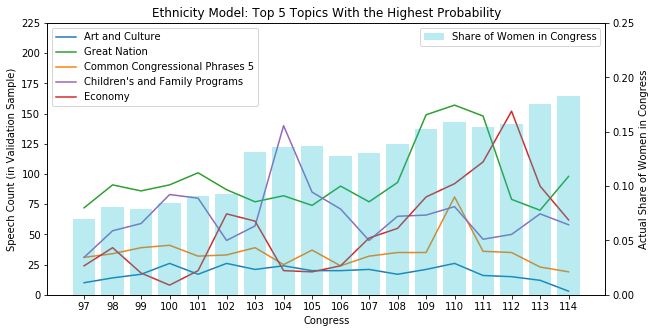

In [24]:
# this code is for 5 top topics. 
top_ethnicity_topics = ["Art and Culture", "Great Nation", "Common Congressional Phrases 5",
                     "Children's and Family Programs", "Economy"] # insert list of top topics
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red']
fig, ax1 = plt.subplots(figsize=(10,5))
plt.xlabel('Congress')
plt.ylabel('Speech Count (in Validation Sample)')
plt.title('Ethnicity Model: Top 5 Topics With the Highest Probability')

for i in range(len(top_ethnicity_topics)):
    x = congress_df[congress_df.Prim_Topic_Name_==top_ethnicity_topics[i]].Congress_
    y = congress_df[congress_df.Prim_Topic_Name_==top_ethnicity_topics[i]].speech_id_count
    ax1.plot(x, y, color=colors[i], label=top_ethnicity_topics[i])
    ax1.set_xticks(range(97,115))
    ax1.legend()
ax1.set_ylim(0, 225)
ax2 = ax1.twinx()
ax2.bar(speaker_share_congress.Congress, speaker_share_congress.NonWhite, color='tab:cyan', alpha=0.3, label='Share of Women in Congress')
ax2.set_ylim(0, 0.25)
ax2.legend(loc='upper right')
ax2.set_ylabel('Actual Share of Women in Congress')
plt.show()

### Top topics in probability bins

In [25]:
final_df.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,...,Topic_Count,Prim_Topic,Prim_Topic_Name,Prim_Topic_Contrib,Prim_Topic_Keywords,Sec_Topic,Sec_Topic_Name,Sec_Topic_Contrib,Speech_id,Correct_pred
0,1010243717,19901025,870,166,101110870.0,D,101,H,TX,B,...,8.0,22.0,Random Verbs 2,0.35,"get,think,want,come,know,talk,us,way,see,try",32.0,Women's and Labor Rights,0.21,1010243717,False
1,1120097305,20120416,1186,197,112116570.0,R,112,H,OH,AAPIA,...,10.0,19.0,Positive Words,0.20,"community,serve,service,honor,award,dr,univers...",20.0,Military Service,0.14,1120097305,True
2,1020183502,19920630,257,40,102111850.0,D,102,H,TX,H,...,4.0,23.0,Common Congressional Phrases 2,0.37,"amendment,vote,amendments,senators,ask_unanimo...",29.0,Finance,0.21,1020183502,False
3,1080187463,20041001,2689,420,108115260.0,D,108,H,MD,B,...,10.0,17.0,Children's and Family Programs,0.27,"children,program,families,provide,help,child,n...",19.0,Positive Words,0.27,1080187463,True
4,1090010764,20050309,7723,1156,109116411.0,D,109,S,HI,AAPIA,...,11.0,13.0,Veterans,0.31,"veterans,service,federal,legislation,benefit,t...",21.0,Foreign Trade,0.18,1090010764,True


In [26]:
# set to 3 bins
bins = [0, 0.4, 0.6, 1]
final_df['binned'] = np.digitize(final_df.pred_probs_combo, bins)
final_df['binned'].value_counts()

1    26930
3    19828
2    16082
Name: binned, dtype: int64

In [27]:
topic_share = final_df[['Prim_Topic_Name', 'speech_id']].groupby('Prim_Topic_Name').count() / final_df.shape[0]
topic_share.columns = ['topic_share']
topic_share.reset_index(inplace=True)
topic_share.head()

,Prim_Topic_Name,topic_share
0,Air Travel,0.001034
1,Art and Culture,0.005188
2,Bankruptcy and Liability,0.001178
3,Children's and Family Programs,0.018682
4,Common Congressional Phrases,0.100812


In [28]:
prob_by_bin = final_df[['binned', 'pred_probs_combo']].groupby('binned').max() 
prob_by_bin.reset_index(inplace=True)
prob_by_bin.columns = ['Bin', 'bin_max_prob']
prob_by_bin.head()

,Bin,bin_max_prob
0,1,0.399968
1,2,0.599965
2,3,0.999540


In [29]:
prob_by_ethnicity = final_df[['NonWhite', 'pred_probs_combo']].groupby('NonWhite').max() 
prob_by_ethnicity.reset_index(inplace=True)
prob_by_ethnicity.columns = ['ethnicity', 'ethnicity_max_prob']
prob_by_ethnicity.head()

,ethnicity,ethnicity_max_prob
0,0.0,0.985661
1,1.0,0.999540


In [30]:
cnt_by_bin = final_df[['binned', 'speech_id']].groupby(['binned']).count().reset_index()
cnt_by_bin.columns = ['Bin', 'Speech_cnt_bin']
cnt_by_bin.head()

,Bin,Speech_cnt_bin
0,1,26930
1,2,16082
2,3,19828


In [31]:
cnt_by_ethnicity = final_df[['NonWhite', 'speech_id']].groupby(['NonWhite']).count().reset_index()
cnt_by_ethnicity.columns = ['ethnicity', 'Speech_cnt_ethnicity']
cnt_by_ethnicity.head()

,ethnicity,Speech_cnt_ethnicity
0,0.0,31420
1,1.0,31420


In [32]:
cnt_by_bin_topic = final_df[['Prim_Topic_Name', 'binned', 'speech_id']].groupby(['binned', 'Prim_Topic_Name']).count().reset_index()
cnt_by_bin_topic.columns = ['Bin', 'Prim_Topic_Name', 'Speech_cnt_bin_topic']
cnt_by_bin_topic = cnt_by_bin_topic.merge(cnt_by_bin, on='Bin')
cnt_by_bin_topic['topic_bin_share'] = cnt_by_bin_topic.Speech_cnt_bin_topic / cnt_by_bin_topic.Speech_cnt_bin
cnt_by_bin_topic = cnt_by_bin_topic.merge(topic_share, on='Prim_Topic_Name').merge(prob_by_bin, on='Bin')
cnt_by_bin_topic['topic_share_index'] = cnt_by_bin_topic.topic_bin_share / cnt_by_bin_topic.topic_share
cnt_by_bin_topic.head()

,Bin,Prim_Topic_Name,Speech_cnt_bin_topic,Speech_cnt_bin,topic_bin_share,topic_share,bin_max_prob,topic_share_index
0,1,Air Travel,20,26930,0.000743,0.001034,0.399968,0.717987
1,1,Art and Culture,49,26930,0.001820,0.005188,0.399968,0.350734
2,1,Bankruptcy and Liability,36,26930,0.001337,0.001178,0.399968,1.135195
3,1,Children's and Family Programs,213,26930,0.007909,0.018682,0.399968,0.423361
4,1,Common Congressional Phrases,2654,26930,0.098552,0.100812,0.399968,0.977584


In [33]:
cnt_by_ethnicity_topic = final_df[['Prim_Topic_Name', 'NonWhite', 'speech_id']].groupby(['NonWhite', 'Prim_Topic_Name']).count().reset_index()
cnt_by_ethnicity_topic.columns = ['ethnicity', 'Prim_Topic_Name', 'Speech_cnt_ethnicity_topic']
cnt_by_ethnicity_topic = cnt_by_ethnicity_topic.merge(cnt_by_ethnicity, on='ethnicity')
cnt_by_ethnicity_topic['topic_ethnicity_share'] = cnt_by_ethnicity_topic.Speech_cnt_ethnicity_topic / cnt_by_ethnicity_topic.Speech_cnt_ethnicity
cnt_by_ethnicity_topic = cnt_by_ethnicity_topic.merge(topic_share, on='Prim_Topic_Name').merge(prob_by_ethnicity, on='ethnicity')
cnt_by_ethnicity_topic['topic_share_index'] = cnt_by_ethnicity_topic.topic_ethnicity_share / cnt_by_ethnicity_topic.topic_share
cnt_by_ethnicity_topic.head()

,ethnicity,Prim_Topic_Name,Speech_cnt_ethnicity_topic,Speech_cnt_ethnicity,topic_ethnicity_share,topic_share,ethnicity_max_prob,topic_share_index
0,0.0,Air Travel,30,31420,0.000955,0.001034,0.985661,0.923077
1,0.0,Art and Culture,92,31420,0.002928,0.005188,0.985661,0.564417
2,0.0,Bankruptcy and Liability,38,31420,0.001209,0.001178,0.985661,1.027027
3,0.0,Children's and Family Programs,387,31420,0.012317,0.018682,0.985661,0.659284
4,0.0,Common Congressional Phrases,3248,31420,0.103374,0.100812,0.985661,1.025414


In [34]:
for b in range(1,len(bins)+1):
    temp = cnt_by_bin_topic[cnt_by_bin_topic['Bin']==b]
    temp = temp.sort_values(by='topic_share_index', ascending=False)
    temp = temp[['bin_max_prob', 'Prim_Topic_Name', 'topic_share_index']]
    print(temp.head())

    bin_max_prob                 Prim_Topic_Name  topic_share_index
17      0.399968                   Foreign Trade           1.626592
13      0.399968                          Energy           1.477623
7       0.399968  Common Congressional Phrases 4           1.448057
32      0.399968                        The Navy           1.400074
28      0.399968                  Random Verbs 2           1.371970
    bin_max_prob               Prim_Topic_Name  topic_share_index
36      0.599965                    Air Travel           1.442760
65      0.599965           Scientific Research           1.379827
70      0.599965               War and Defense           1.354557
58      0.599965     Intelligence and Security           1.340755
40      0.599965  Common Congressional Phrases           1.234231
    bin_max_prob                 Prim_Topic_Name  topic_share_index
73       0.99954                 Art and Culture           2.138761
91       0.99954                    Great Nation           2

In [35]:
NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')

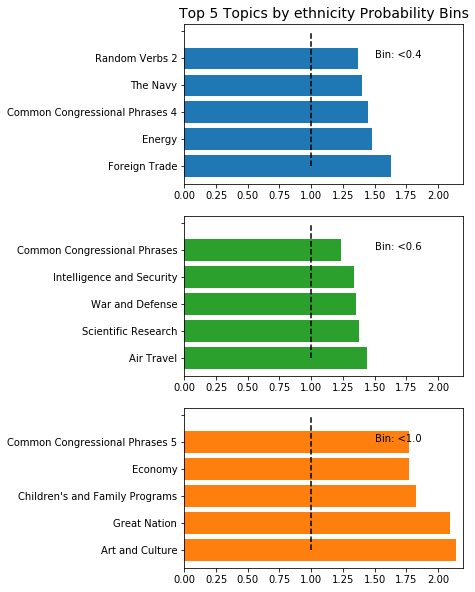

In [36]:
fig, axes = plt.subplots(nrows=len(bins)-1, figsize=(5, 10))
# fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
# fig.suptitle('Topic Share Index', fontsize=14)
axes[0].set_title('Top 5 Topics by ethnicity Probability Bins', fontsize=14)
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:red']

for ax, b in zip(axes, range(len(bins)-1)):
    temp = cnt_by_bin_topic[cnt_by_bin_topic['Bin']==b+1]
    temp = temp.sort_values(by='topic_share_index', ascending=False)
    temp = temp[['bin_max_prob', 'Prim_Topic_Name', 'topic_share_index']]
    temp = temp.head()
    ax.text(1.5, 4, "Bin: <"+str(round(max(temp.bin_max_prob),2)), fontsize=10)
    ax.barh(temp.Prim_Topic_Name, temp.topic_share_index, align='center', color=colors[b])
    ax.vlines(x=1,ymin=0,ymax=5, linestyles='dashed')
    ax.set_xlim(0,2.2)
    ax.set_yticks(range(0,6))

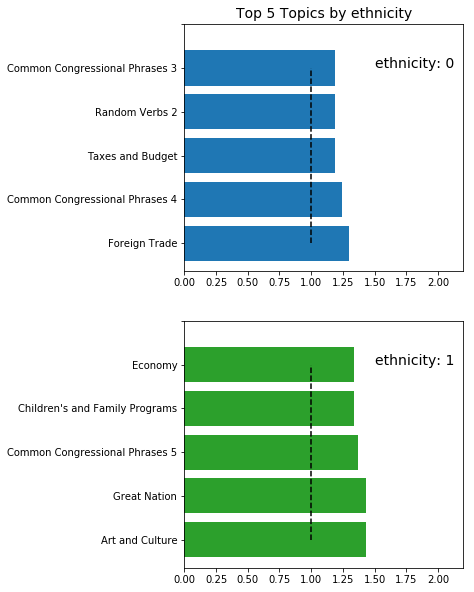

In [40]:
fig, axes = plt.subplots(2, figsize=(5, 10))
# fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
# fig.suptitle('Topic Share Index', fontsize=14)
axes[0].set_title('Top 5 Topics by ethnicity', fontsize=14)
colors = ['tab:blue', 'tab:green']

for ax, b in zip(axes, range(2)):
    temp = cnt_by_ethnicity_topic[cnt_by_ethnicity_topic['ethnicity'] == b]
    temp = temp.sort_values(by='topic_share_index', ascending=False)
    temp = temp[['ethnicity', 'Prim_Topic_Name', 'topic_share_index']]
    temp = temp.head()
    ax.text(1.5, 4, "ethnicity: "+str(b), fontsize=14)
    ax.barh(temp.Prim_Topic_Name, temp.topic_share_index, align='center', color=colors[b])
    ax.vlines(x=1,ymin=0,ymax=4, linestyles='dashed')
    ax.set_xlim(0,2.2)
    ax.set_yticks(range(0,6))

In [41]:
# highest count topics by bins
for b in range(1,len(bins)+1):
    temp = final_df[final_df['binned']==b]
    temp = temp[['speech_id', 'pred_probs_combo', 'Prim_Topic_Name']]\
                .groupby('Prim_Topic_Name')\
                .agg({'speech_id':['count'], 'pred_probs_combo': ['mean']})\
                .sort_values(by=('speech_id', 'count'), ascending=False)\
                .reset_index()
    print("Bin: ", bins[b-1])
    print(temp.head(5))

Bin:  0
                  Prim_Topic_Name speech_id pred_probs_combo
                                      count             mean
0                  Random Verbs 2      4706         0.227292
1  Common Congressional Phrases 2      3086         0.228653
2    Common Congressional Phrases      2654         0.251664
3  Common Congressional Phrases 3      2114         0.262745
4                  Positive Words      1600         0.236441
Bin:  0.4
                  Prim_Topic_Name speech_id pred_probs_combo
                                      count             mean
0    Common Congressional Phrases      2001         0.495669
1                  Random Verbs 2      1762         0.491767
2  Common Congressional Phrases 2      1761         0.497791
3  Common Congressional Phrases 3      1242         0.485479
4                  Positive Words       898         0.497645
Bin:  0.6
                  Prim_Topic_Name speech_id pred_probs_combo
                                      count             m